# TCP
* https://datatracker.ietf.org/doc/html/rfc793

# Protocol

> TCP/IP Illustrated, Volume 1: The Protocols 12-17

## Format

Header:

```
    0                   1                   2                   3
    0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |          Source Port          |       Destination Port        |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |                        Sequence Number                        |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |                    Acknowledgment Number                      |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |  Data |       |C|E|U|A|P|R|S|F|                               |
   | Offset| Rsrvd |W|C|R|C|S|S|Y|I|            Window             |
   |       |       |R|E|G|K|H|T|N|N|                               |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |           Checksum            |         Urgent Pointer        |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |                           [Options]                           |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
   |                                                               :
   :                             Data                              :
   :                                                               |
   +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
```

- Data Offset: the number of 32-bit words in the TCP header

- CWR: Congestion Window Reduced (the sender reduced its sending rate)
- ECE: ECN-Echo (the sender received an Earlier Congestion Notification)
- URG: Urgent point field is significant
- ACK: Acknowledgement field is significant
- PSH: Push function (the receiver should pass this data to the application ASAP, not reliably implemented or used)
- RST: Reset the connection (connection abort, usually because of an error)
- SYN: Synchronize sequence numbers to intiate a connection
- FIN: No more data from sender

- Window: the amount of empty spaces (in bytes) remainning in the receiver buffer 

options:
- MSS: Maximum Segment Size
- SACK
- Timestamp
- Window Scale
- ...

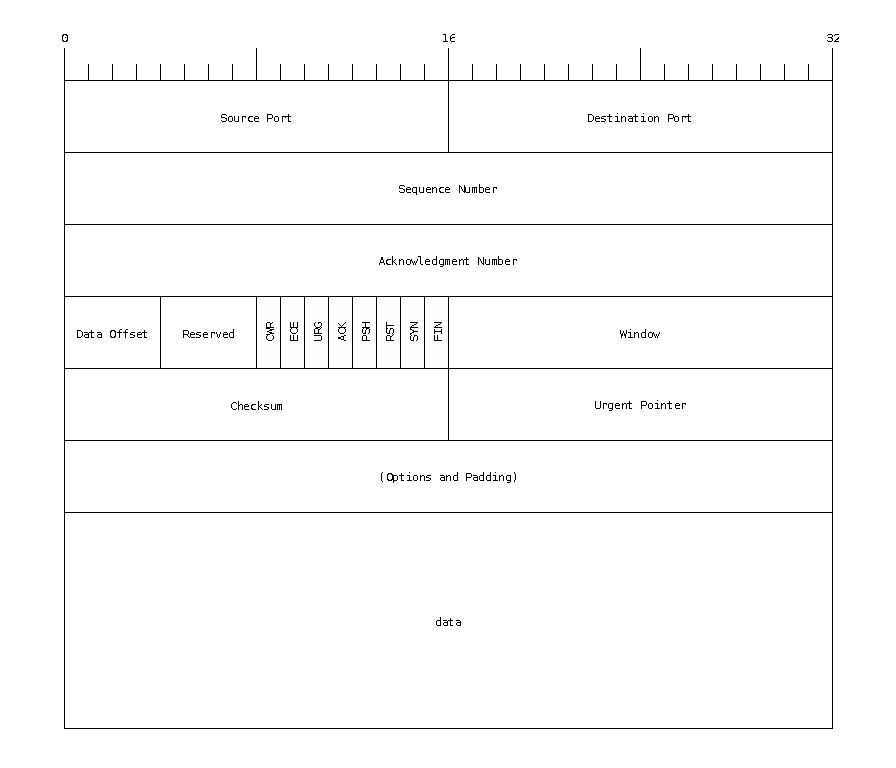

In [ ]:
!packetdiag -f C:/Windows/Fonts/DejaVuSansMono.ttf -o diag/tcp-rfc9293.png diag/tcp-rfc9293.diag
from IPython.display import Image
Image(filename="diag\\tcp-rfc9293.png") 

## TCP Connection Management

TCP Options:
- EOL: end of option list
- NOP no operation (for padding)
- MSS: maximum segment size
- WSOPT: window scaling factor (left-shift amount on window)
- SACK-Permitted: sender supports SACK options
- SACK: SACK block (out-of-order data received)
- TSOPT: Timestamp option
- UTO: User Timeout (aboirt after idle time)
- TCP-AO: authentication option


Path MTU Discovery with TCP(PMTUD):
- SMSS: send maximum segment size

## TCP Timeout and Retransmission

RTO: retransmission timeout

## TCP Data Flow and Window Management

## TCP Congestion Control

$$
W = min(cwnd, awnd)
$$

- W: sender's actual usable window
- cwnd: congestion window, the estimate of the network's available capacity
- awnd: receiver's advertised window


flight size: 
- the total amount of data a sender has introduced into the netowrk for which it has not yet received an acknowledgement
- always <= W


BDP (bandwidth-delay product) of the network path, the optimal window size:
- equal to the product of the RTT and the capacity of the lowest capacity(bottleneck) link on the path from sender to receiver

a conservation of packets in the network: 网络中留存报文

ACK clock: the opration of TCP congestion control at a sender is driven/clocked by the receipt of ACKs.


algorithms

- slow start
  - IW: initial window
    - 2 or 3 or 4 SMSS: special case $IW = 1 \ SMSS$
  - no loss and ACKed: k round-trip, $cwnd = 2^{k}$
  - $cwnd \le ssthresh$
  - switch to congestion avoidance: $cwnd >= ssthresh$




- congestion avoidance
  - seek additional capacity by increasing $cwnd$ by approminately 1 segment for each window's worth of data that is moved from sender to receiver successfully
  - $cwnd_{t+1} = cwnd_{t} + SMSS * SMSS / cwnd_{t}$

ssthreash:
- holds the lower bound on TCP's best estimate of the optimal window size
- initial: $ssthresh = awnd$
- when retransmision occur: ssthresh = $max(flight \ size / 2, 2 * SMSS)$

## TCP Keepalive

- keepalive timer
- keepalive probe

# Linux Kernel Parameters

In [1]:
%env ROOT_PWD=zhoujiagen

env: ROOT_PWD=zhoujiagen


In [2]:
!echo $ROOT_PWD | sudo -S sysctl -a | grep tcp | sort

[sudo] password for zhoujiagen: fs.nfs.nfs_callback_tcpport = 0
fs.nfs.nlm_tcpport = 0
net.ipv4.tcp_abort_on_overflow = 0
net.ipv4.tcp_adv_win_scale = 1
net.ipv4.tcp_allowed_congestion_control = reno cubic
net.ipv4.tcp_app_win = 31
net.ipv4.tcp_autocorking = 1
net.ipv4.tcp_available_congestion_control = reno cubic
net.ipv4.tcp_available_ulp = 
net.ipv4.tcp_base_mss = 1024
net.ipv4.tcp_challenge_ack_limit = 1000
net.ipv4.tcp_comp_sack_delay_ns = 1000000
net.ipv4.tcp_comp_sack_nr = 44
net.ipv4.tcp_comp_sack_slack_ns = 100000
net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_dsack = 1
net.ipv4.tcp_early_demux = 1
net.ipv4.tcp_early_retrans = 3
net.ipv4.tcp_ecn = 2
net.ipv4.tcp_ecn_fallback = 1
net.ipv4.tcp_fack = 0
net.ipv4.tcp_fastopen = 1
net.ipv4.tcp_fastopen_blackhole_timeout_sec = 0
net.ipv4.tcp_fastopen_key = 3505c42c-a69cac12-e7bee254-a366e74c
net.ipv4.tcp_fin_timeout = 60
net.ipv4.tcp_frto = 2
net.ipv4.tcp_fwmark_accept = 0
net.ipv4.tcp_invalid_ratelimit = 500
net.ipv4.tcp_keep

# Programming

> UNIX网络编程卷1：套接字API - 2.4 TCP: 传输控制协议

- 1. TCP提供客户与服务器的连接connection.
- 2. TCP提供可靠性: TCP向另一端发送数据时, 要求对方返回一个确认.
  - 如果确认没有收到, TCP自动重传数据并等待更长时间. 数次重传失败后才放弃.
  - 动态估算客户到服务器往返时间RTT(round-trip time)的算法
- 3. TCP通过给发送数据的每个字节关联一个序列号进行排序.
  - 接收方TCP根据分节中序列号排序, 再把结果传递给应用进程.
  - 接收到重复的数据直接丢弃.
- 4. TCP提供流量控制: 总是告诉对方它能够接受多少字节的数据(通告窗口advertised window).
  - 窗口时刻动态的变化.
- 5. TCP的连接时全双工的: 在连接上的应用进程既可以发送也可以接收数据.   

> UNIX网络编程卷1：套接字API - 2.5 TCP连接的建立和终止

TCP连接建立: 三路握手

TCP连接终止

TCP状态转换图

![](./images/TCP状态转换图.png)



- CLOSED: 起始点
- LISTEN: 被动打开, 预期接收SYN
- SYN_SENT: 主动打开, 发送SYN
- SYN_RCVD: 接收SYN
- ESTABLISHED: 连接建立
- CLOSE_WAIT, LAST_ACK
  - 被动关闭: 接收FIN
- FIN_WAIT_1, FIN_WAIT_2, CLOSING, TIME_WAIT
  - 主动关闭: 发送FIN

TIME_WAIT: 2MSL超时(最大分节生命期MSL: maximum segment lifetime)
- MSL是IP数据报在网络中生存的最长时间: 具有最大跳数的分组不能超过MSL还继续存在.
- 分组因路由和超时重传机制产生重复: lost duplicate, wandering duplicate
- 理由1 实现中TCP全双工连接的可靠性
  - 全双工关闭: 必须正确处理连接终止4个分节中任何一个分节的丢失情况.
  - 主动关闭端可能需要重发最终的ACK.
- 理由2 允许旧的重复分节在网络中消逝
  - TCP不能给处于TIME_WAIT状态的连接启动新的化身, 以让先前化身的老重复分组在网络中消逝.